# US Baby Names

Data set in 'da_practice/data/babynames/'

The dataset contains names from 1880 to 2010, in a separate file for each year. Then, in addition to preparing a dataset with all the data available in a DataFrame, we can analyze some name trends, compare according to sex, among other analyses.

#### First, let's import some libraries to work with.

In [33]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### And to start with the dataset, we first need to know what we have. 

In [34]:
# Exploring one file to see what to expect
path = "../data/babynames/yob1900.txt"
with open(path, 'r') as f:
    lines = f.readlines()

print(f"First 10 lines: \n{lines[:10]}")

First 10 lines: 
['Mary,F,16710\n', 'Helen,F,6343\n', 'Anna,F,6115\n', 'Margaret,F,5305\n', 'Ruth,F,4765\n', 'Elizabeth,F,4097\n', 'Florence,F,3920\n', 'Ethel,F,3896\n', 'Marie,F,3856\n', 'Lillian,F,3414\n']


#### The file is comma separated, we can use `pandas.read_csv` to work with it.

In [35]:
# Reading first year 1880
path = "../data/babynames/yob1880.txt"

# We have to specified the header
names1880 = pd.read_csv(path, names=["name", "sex", "births"])

print(names1880[:10])

        name sex  births
0       Mary   F    7065
1       Anna   F    2604
2       Emma   F    2003
3  Elizabeth   F    1939
4     Minnie   F    1746
5   Margaret   F    1578
6        Ida   F    1472
7      Alice   F    1414
8     Bertha   F    1320
9      Sarah   F    1288


#### Creating a DataFrame with every available year, concatenating the files.

In [36]:
# Merging all the files in one DataFrame
pieces = []
for year in np.arange(1880, 2011):
    path = f"../data/babynames/yob{year}.txt"
    frame = pd.read_csv(path, names=["name", "sex", "births"])

    frame["year"] = year # New column for the year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=True)
# We ignore index returned by 'read_csv' because we are not interested in it
# We wan other index with all the cases

names = pd.DataFrame(names)
names["sex"] = names["sex"].astype("category")
names["births"] = names["births"].astype("Int64")

print(f"Names dataset: \n{names.sample(10)}")


Names dataset: 
            name sex  births  year
1042772  Correll   M       7  1988
1493046  Aiyanah   F      16  2005
351214    Rosine   F      10  1938
297409       Rue   F       8  1932
885426    Janita   F      39  1981
1368065    Deysy   F      18  2001
1315928   Nitzia   F       7  1999
204390     Odeal   F      14  1923
361618     Antha   F       5  1939
1258903   Ginnie   F       8  1997


Total births per year: 
sex         F        M
year                  
2003  1824406  1972439
2004  1833005  1981557
2005  1843890  1993285
2006  1896468  2050234
2007  1916888  2069242
2008  1883645  2032310
2009  1827643  1973359
2010  1759010  1898382


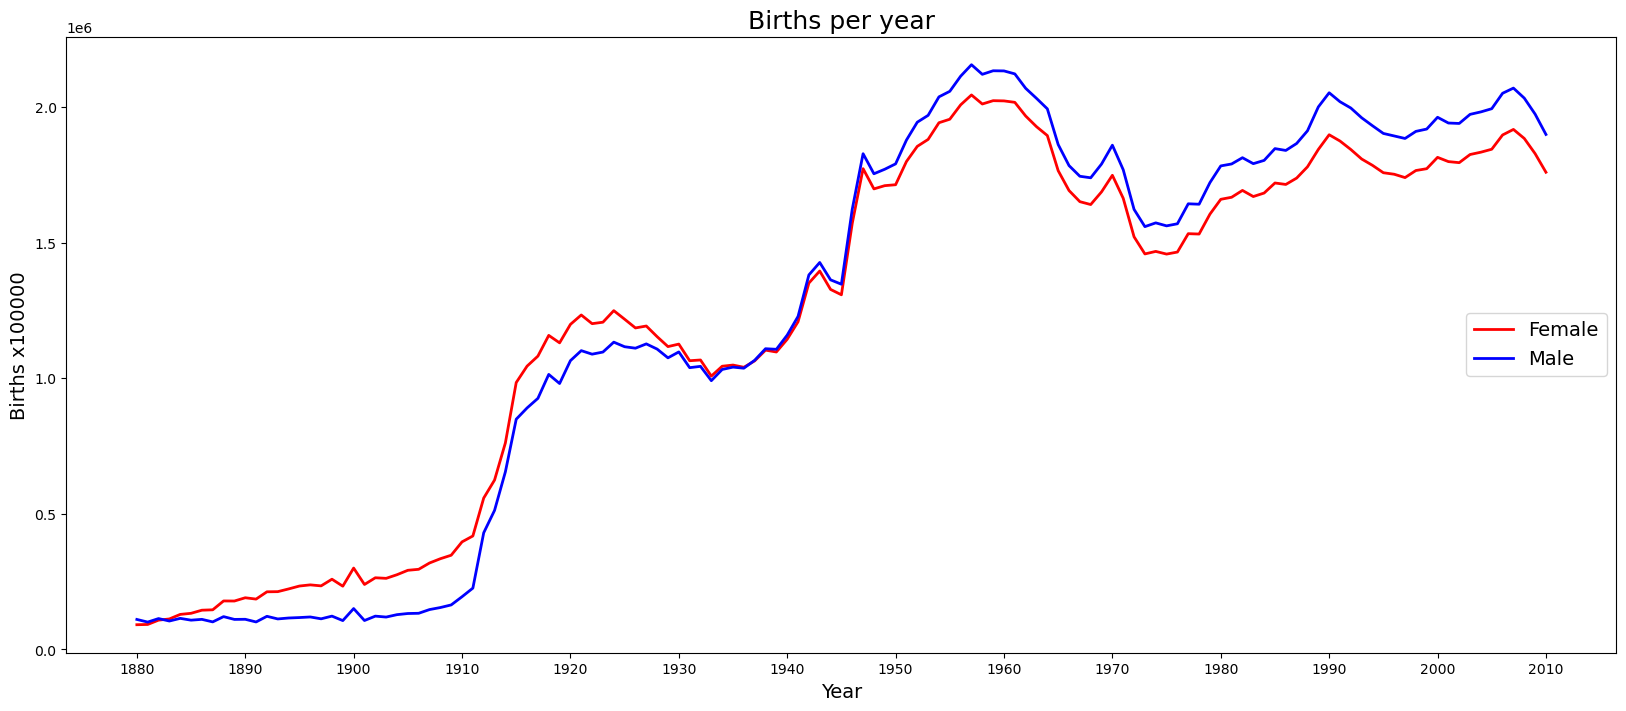

In [37]:
## Exploring 

#total_births = names.groupby(["year", "sex"])["births"].sum()
total_births_graph = names.pivot_table("births",
                                       index="year",
                                       columns="sex",
                                       aggfunc=sum)

print(f"Total births per year: \n{total_births_graph.tail(8)}")

# Generating a visualization with Matplotlib:
fig, ax = plt.subplots(figsize=(20, 8))
year = np.arange(1880, 2011)

ax.plot(year, total_births_graph["F"], 
        color="red", linewidth=2, label="Female")
ax.plot(year, total_births_graph["M"], 
        color="blue", linewidth=2, label="Male")

ax.set(xlabel="Year", 
       ylabel="Births x100000", 
       title="Births per year")
plt.rc('axes', labelsize=14, titlesize=18)
plt.xticks(np.arange(1880, 2011, 10))
plt.legend(loc="right", facecolor="w", fontsize=14)

plt.show()

#### In the graph above we see how the lines flow almost parallel, would there be a statistical difference between sexes?

In the next test, which is T-test for dependent samples, we can calculate whether there are differences over time by comparing two groups (Male and Female). 
It turns out that a P-value greater than 0.05 (the value 0.05 is the established cut-off point) which suggests to us that there are no differences between the means of the groups. 
Therefore, we could say that over time there are no differences between the number of births comparing males and females.

In [38]:
t_stat, p_val = stats.ttest_rel(total_births_graph["M"],
                                total_births_graph["F"])

print(f"T= {t_stat:.4f}")
print(f"P value= {p_val:.4f}")

T= 1.9004
P value= 0.0596


Now we can add a proportion and percentage columnns.

In [39]:
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()

    return group

names = names.groupby(["year", "sex"]).apply(add_prop).reset_index(drop=True)
# We add '.reset_index(drop=True)' after .groupby().apply() to avoid errors
# because 'groupby()' create a new index column with the group

print(f"Sample of names: \n{names.sample(8)}")


Sample of names: 
             name sex  births  year      prop
56015        Emma   F    2374  1901  0.009918
592104     Robbie   M     684  1961  0.000322
1265155      Andy   M    1409  1997  0.000748
224079       Lynn   F     101  1925  0.000083
399743      Jules   M      96  1943  0.000067
1068855  Rathanak   M       5  1989  0.000003
1092345    Sohrab   M       6  1990  0.000003
1498861    Yojana   F       8  2005  0.000004


In [40]:
def get_top1000(group):
    return group.sort_values("births", ascending=False)[:1000]

grouped = names.groupby(["year", "sex"], axis=0)
top1000 = grouped.apply(get_top1000).reset_index(drop=True)

print(f"Top 15 names: \n{top1000.head(8)}")

Top 15 names: 
        name sex  births  year      prop
0       Mary   F    7065  1880  0.077643
1       Anna   F    2604  1880  0.028618
2       Emma   F    2003  1880  0.022013
3  Elizabeth   F    1939  1880  0.021309
4     Minnie   F    1746  1880  0.019188
5   Margaret   F    1578  1880  0.017342
6        Ida   F    1472  1880  0.016177
7      Alice   F    1414  1880   0.01554


### Let's analize some naming trends:

We can see in the next visualization a comparison of popularity between some names.

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: Int64(6868)
memory usage: 7.7 MB

Info from data: None


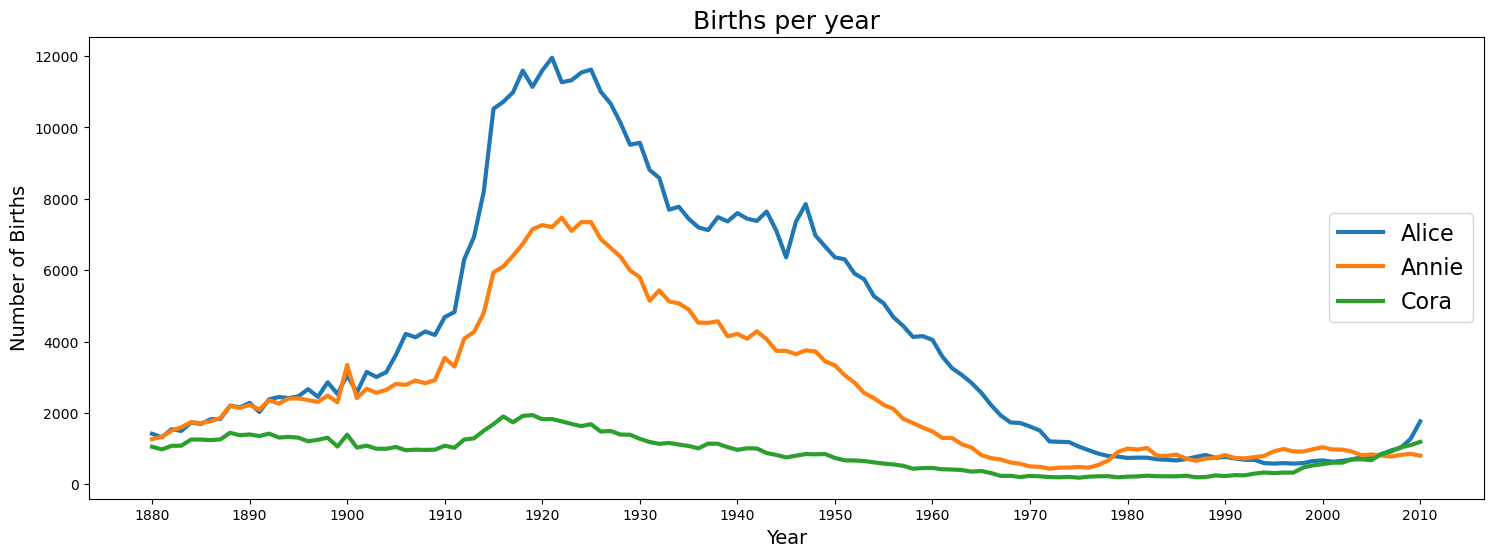

In [41]:
# Split into boys and girls
boys = top1000[top1000["sex"] == "M"]
girls = top1000[top1000["sex"] == "F"]

# Pivot table, total births by year and name
tot_births = top1000.pivot_table("births", index="year",
                                 columns="name",
                                 aggfunc=sum)

subset = tot_births[["Mary", "Alice", "Annie", "Cora"]]

print(f"\nInfo from data: {tot_births.info()}")

# Visualization
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(year, subset["Alice"], label="Alice", linewidth=3)
ax.plot(year, subset["Annie"], label="Annie", linewidth=3)
ax.plot(year, subset["Cora"], label="Cora", linewidth=3)

ax.set(xlabel="Year", 
       ylabel="Number of Births", 
       title="Births per year")

plt.rc('axes', labelsize=14, titlesize=18)
plt.xticks(np.arange(1880,2011,10))
plt.legend(loc="right", fontsize=16)
plt.show()

### Popularity of top 1000 names

We can see that the popularity of the most popular names in the early 1900s decreases as the years go by.

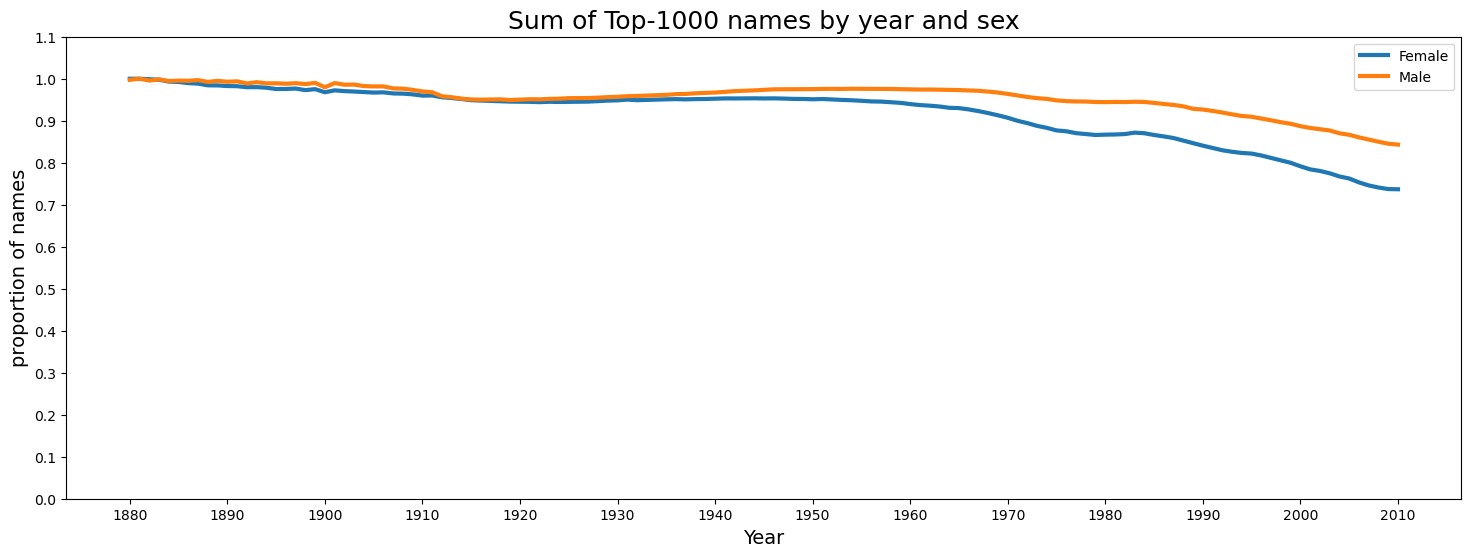

In [42]:
# Generating table of proportions
top_prop = top1000.pivot_table("prop", 
                               index="year", 
                               columns="sex", 
                               aggfunc=sum)

# Visualization
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(year, top_prop["F"], label="Female", linewidth=3)
ax.plot(year, top_prop["M"], label="Male", linewidth=3)

ax.set(xlabel="Year", 
       ylabel="proportion of names", 
       title="Sum of Top-1000 names by year and sex")

plt.rc("axes", labelsize=14, titlesize=18)
plt.xticks(np.arange(1880,2011,10))
plt.yticks(np.arange(0,1.2,0.1))
plt.legend()
plt.show()

Sample of rows from the dataframe: 
            name sex  births  year      prop quintile
71284    Gabriel   M     173  1915  0.000204       Q3
60345       Elda   F      73  1910  0.000184       Q3
145224     Irvin   M     391  1952  0.000201       Q3
179309    Andres   M     334  1969  0.000187       Q3
224445  Kiersten   F     409  1992  0.000222       Q3
241538     Jairo   M     271  2000  0.000138       Q3
182481   Lourdes   F     283  1971   0.00017       Q3
160497      Jami   F     263  1960   0.00013       Q3

Sample of the resulting dataframe: 
sex     F    M
year          
1965  200  143
1999  363  217
1998  364  224
1985  286  189
1988  306  184
1967  194  145


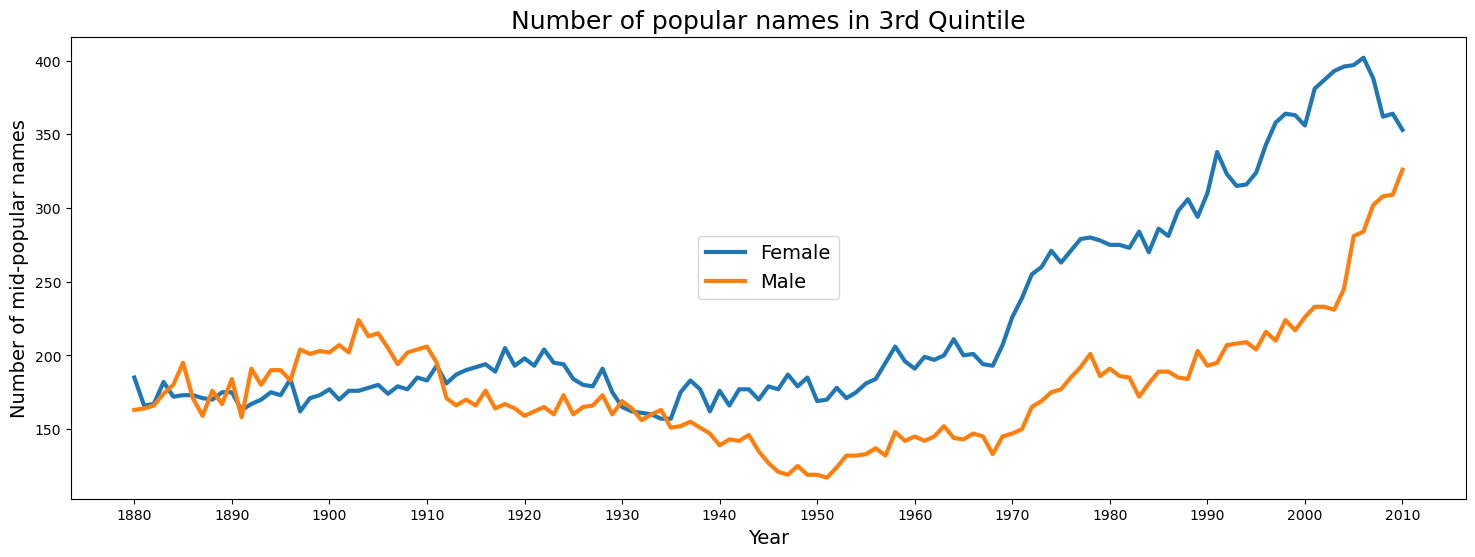

In [43]:
t1_ord = top1000.sort_values("prop", ascending=False)

# Creating a categorical column referencing the quintile (20% each)
t1_ord["quintile"] = pd.qcut(t1_ord["prop"], 5, ["Q1", "Q2", "Q3", "Q4", "Q5"])
df = t1_ord[t1_ord["quintile"] == "Q3"]

print(f"Sample of rows from the dataframe: \n{df.sample(8)}")

# Function to extract the position in the cumulative sum
# Returning the count for each group when applied
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1
# we sum +1 because the array are zero-indexed

diversity = df.groupby(["year", "sex"]).apply(get_quantile_count)
diversity = diversity.unstack()
print(f"\nSample of the resulting dataframe: \n{diversity.sample(6)}")

# Visualization
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(year, diversity["F"], label="Female", linewidth=3)
ax.plot(year, diversity["M"], label="Male", linewidth=3)

ax.set(xlabel="Year", 
       ylabel="Number of mid-popular names", 
       title="Number of popular names in 3rd Quintile")

plt.rc("axes", labelsize=14, titlesize=18)
plt.xticks(np.arange(1880,2011,10))
plt.legend(loc="center", fontsize=14)
plt.show()


#### Considering the above graph, we can see how the lines separate. But statistically speaking, would there be differences?

In the next test, which is T-test for dependent samples, we can calculate whether there are differences over time by comparing two groups (Male and Female). It results in a P-value of less than 0.001 which suggests that there is a difference between the groups. Therefore, we could say that there are differences in the variability of intermediate popularity names between males and females over time.


In [44]:
t_stat, p_val = stats.ttest_rel(diversity["M"],
                                diversity["F"])

print(f"T= {t_stat:.4f}")
print(f"P value= {p_val:.4f}")


T= -10.1314
P value= 0.0000


#### Now we are going to see how some names changes to be used more in males or females.

Last 5 cases of Taylor names:
sex          F         M
year                    
2006  0.848939  0.151061
2007   0.84768   0.15232
2008  0.859593  0.140407
2009   0.87406   0.12594
2010  0.860838  0.139162

Last 5 cases of Taylor names:
sex     F    M
year          
2006  1.0  0.0
2007  1.0  0.0
2008  1.0  0.0
2009  1.0  0.0
2010  1.0  0.0


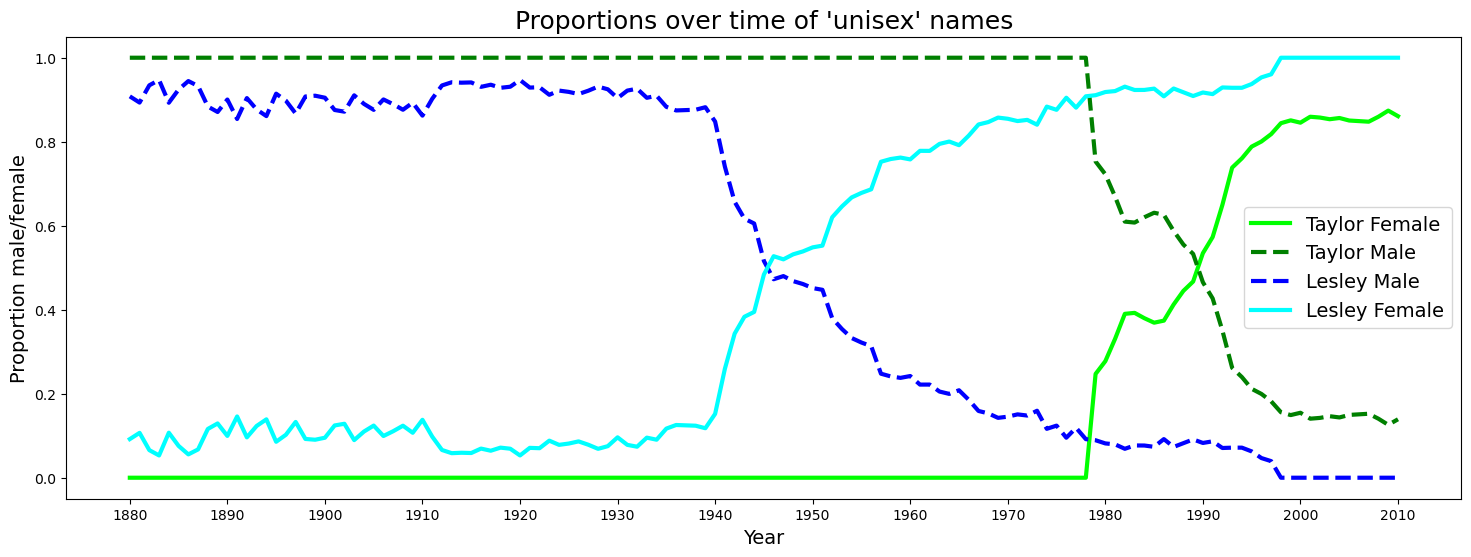

In [45]:
# Filtering 'unisex' names
all_names = pd.Series(top1000["name"].unique())
lesley_like = all_names[all_names.str.contains("Lesl")]
taylor_like = all_names[all_names.str.contains("Tayl")]

# Extracting taylor like names
taylor_filt = top1000[top1000["name"].isin(taylor_like)]
taylor_filt.groupby("name")["births"].sum()
taylor_table = taylor_filt.pivot_table("births", 
                                       index="year",
                                       columns="sex",
                                       aggfunc="sum")
taylor_table = taylor_table.div(taylor_table.sum(axis="columns"), 
                                      axis="index")

# Extracting lesley like names
lesley_filt = top1000[top1000["name"].isin(lesley_like)]
lesley_filt.groupby("name")["births"].sum()
lesley_table = lesley_filt.pivot_table("births", 
                                       index="year",
                                       columns="sex", 
                                       aggfunc="sum")
lesley_table = lesley_table.div(lesley_table.sum(axis="columns"), 
                                      axis="index")

print(f"Last 5 cases of Taylor names:\n{taylor_table.tail()}")
print(f"\nLast 5 cases of Taylor names:\n{lesley_table.tail()}")

# Visualization
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(taylor_table.index, 
        taylor_table["F"], 
        label="Taylor Female", 
        linewidth=3,
        color="lime")
ax.plot(taylor_table.index, 
        taylor_table["M"], 
        label="Taylor Male", 
        linewidth=3,
        linestyle="--",
        color="green")

ax.plot(lesley_table.index, 
        lesley_table["M"], 
        label="Lesley Male", 
        linewidth=3,
        linestyle="--",
        color="blue")
ax.plot(lesley_table.index, 
        lesley_table["F"], 
        label="Lesley Female", 
        linewidth=3,
        color="aqua")

ax.set(xlabel="Year", 
       ylabel="Proportion male/female", 
       title="Proportions over time of 'unisex' names")

plt.rc("axes", labelsize=14, titlesize=18)
plt.xticks(np.arange(1880,2011,10))
plt.legend(loc="right", fontsize=14)
plt.show()


In this last graph we can see how 'Taylor' and 'Lesley' like names change to be used more in males or females over time.